# MIOSTONE: Modeling microbiome-trait associations with taxonomy-adaptive neural networks

## Prerequisites

### Step 1: Import the required functions

In [1]:
import os
import sys
from types import SimpleNamespace

sys.path.insert(1, '../src/')

from experiment import (load_and_preprocess_data,
                        set_args_for_transfer_learning, set_file_name,
                        set_results_dir, train_model)
from utils import load_model, set_device, set_seed
from visualize_attr import (compute_attributions, set_attributions_dir,
                            visualize_node_values)
from visualize_dimred import visualize_embeddings
from visualize_results import (plot_model_metrics, preprocess_results,
                               set_model_selection_param)

### Step 2: Set the required parameters

In [2]:
args = {
    # General Parameters
    'seed': 3,
    'device': 'cpu',

    # Dataset Parameters
    'dataset': 'IBD200',
    'target': 'Type',
    'prob_label': False,
    'rebalance': 'reweight',
    'preprocess': 'clr',
    'phylogeny': "WoL2",
    'taxonomy': True,
    'prune_by_dataset': True,
    'tree_dataset': 'none',
    'tree_target': 'none',
    'prune_by_num_leaves': -1,

    # Model Parameters
    'model': "tree",
    'mlp_type': "pyramid",
    'node_min_dim': 1,
    'node_dim_func': "linear",
    'node_dim_func_param': 0.95,
    'node_gate_type': 'concrete',
    'node_gate_param': 0.1,
    'output_depth': 0,
    'output_truncation': True,

    # Transfer Learning Parameters
    'transfer_learning': "none",
    'pretrained_model_path': "",
    'ft_epochs': 30,

    # Training Parameters
    'k_fold': 3,
    'batch_size': 386,
    'epochs': 50,
    'loss': 'ce',
    'mixup_num_samples': 0,
    'metrics': ['accuracy', 'auroc', 'ap'],

    # Saving Parameters
    'save_model': True,
    'plot_loss': False,

    # Results visualization Parameters
    'combine_folds': True,
    'seeds_agg': 'median',
    'metric': 'ap',
    'metric_avg': 'macro',
    'metric_axis': 'y',
    'plot_type': 'bar',
    'other_axis': 'model',
    'hyperparam': [],
    'model_selection': 'none',
    'top_k': 5,

    # Explanation (Embedding) Parameters
    'algorithm': 'pca',
    'depth': -1,
    'embedding_reduction': 'none',

    # Explanation (Feature Importance) Parameters
    'leaf_attr': 'deeplift',
    'layer_deeplift': True,
    'num_samples': None,
    'top_k_nodes': None,
    'min_depth': 0,
    'max_depth': 5,
    'visualize_depth': 5,
    'save_attributions': False,
}

args = SimpleNamespace(**args)

### Step 3: Set the seed and device

In [3]:
set_seed(args.seed)
device = set_device(args.device)

## PART 1: TRAINING

### Step 1: Load and preprocess the data

In [4]:
custom_tree, dataset, pretrained_seed, hyperparameters = load_and_preprocess_data(args)

diagnosis
0    117
1     73
Name: count, dtype: int64
Number of leaves: 5300


### Step 2: Set up parameters for transfer learning (optional)

In [5]:
if args.transfer_learning != "none":
    set_args_for_transfer_learning(args, pretrained_seed, hyperparameters)

### Step 3: Set up the results directory and filename

In [6]:
results_dir, losses_dir, models_dir = set_results_dir(args.dataset, args.target)
file_name = set_file_name(args)

File name: 3_tree_clr_reweight_386_50_ce_1_linear_0.95_concrete_0.1_0_tx_pd_ot_saved


### Step 4: Train model

In [7]:
train_model(args, device, dataset, custom_tree, file_name, results_dir, losses_dir, models_dir)

FOLD 0
--------------------------------


  2%|▏         | 1/50 [00:06<05:12,  6.38s/it]

Epoch 1/50
Training loss: 1.3874 | Validation loss: 558.9689
Training L0 reg: 7527.3667 | Validation L0 reg: 7524.0410
Training accuracy for class 0: 0.5128 | Validation accuracy for class 0: 0.0769
Training accuracy for class 1: 0.3125 | Validation accuracy for class 1: 0.9600
Training auroc for class 0: 0.4076 | Validation auroc for class 0: 0.5000
Training auroc for class 1: 0.4076 | Validation auroc for class 1: 0.5179
Training ap for class 0: 0.5861 | Validation ap for class 0: 0.6202
Training ap for class 1: 0.3338 | Validation ap for class 1: 0.3996


 22%|██▏       | 11/50 [01:13<04:16,  6.58s/it]

Epoch 11/50
Training loss: 1.6696 | Validation loss: 13.2401
Training L0 reg: 7495.1421 | Validation L0 reg: 7492.1069
Training accuracy for class 0: 0.7051 | Validation accuracy for class 0: 1.0000
Training accuracy for class 1: 0.5833 | Validation accuracy for class 1: 0.0400
Training auroc for class 0: 0.7171 | Validation auroc for class 0: 0.4954
Training auroc for class 1: 0.7169 | Validation auroc for class 1: 0.5764
Training ap for class 0: 0.8489 | Validation ap for class 0: 0.6070
Training ap for class 1: 0.5466 | Validation ap for class 1: 0.4979


 42%|████▏     | 21/50 [02:20<03:10,  6.57s/it]

Epoch 21/50
Training loss: 0.2769 | Validation loss: 1.8680
Training L0 reg: 7468.4995 | Validation L0 reg: 7466.3374
Training accuracy for class 0: 0.8846 | Validation accuracy for class 0: 1.0000
Training accuracy for class 1: 0.8333 | Validation accuracy for class 1: 0.2000
Training auroc for class 0: 0.9501 | Validation auroc for class 0: 0.7354
Training auroc for class 1: 0.9501 | Validation auroc for class 1: 0.7354
Training ap for class 0: 0.9691 | Validation ap for class 0: 0.8187
Training ap for class 1: 0.9319 | Validation ap for class 1: 0.6980


 62%|██████▏   | 31/50 [03:27<02:06,  6.66s/it]

Epoch 31/50
Training loss: 0.1251 | Validation loss: 1.3568
Training L0 reg: 7451.3706 | Validation L0 reg: 7450.2344
Training accuracy for class 0: 0.9103 | Validation accuracy for class 0: 0.5128
Training accuracy for class 1: 0.9583 | Validation accuracy for class 1: 0.7200
Training auroc for class 0: 0.9928 | Validation auroc for class 0: 0.7333
Training auroc for class 1: 0.9928 | Validation auroc for class 1: 0.7333
Training ap for class 0: 0.9955 | Validation ap for class 0: 0.8076
Training ap for class 1: 0.9896 | Validation ap for class 1: 0.7230


 82%|████████▏ | 41/50 [04:35<01:02,  6.97s/it]

Epoch 41/50
Training loss: 0.0551 | Validation loss: 0.9443
Training L0 reg: 7443.9443 | Validation L0 reg: 7443.6299
Training accuracy for class 0: 0.9744 | Validation accuracy for class 0: 0.7179
Training accuracy for class 1: 1.0000 | Validation accuracy for class 1: 0.7200
Training auroc for class 0: 1.0000 | Validation auroc for class 0: 0.7600
Training auroc for class 1: 1.0000 | Validation auroc for class 1: 0.7600
Training ap for class 0: 1.0000 | Validation ap for class 0: 0.8273
Training ap for class 1: 1.0000 | Validation ap for class 1: 0.7335


100%|██████████| 50/50 [05:38<00:00,  6.76s/it]


--------------------------------
Validation accuracy for class 0: 0.6154
Validation accuracy for class 1: 0.7600
Validation auroc for class 0: 0.7549
Validation auroc for class 1: 0.7549
Validation ap for class 0: 0.8237
Validation ap for class 1: 0.7328
FOLD 1
--------------------------------


  2%|▏         | 1/50 [00:06<05:12,  6.37s/it]

Epoch 1/50
Training loss: 1.0092 | Validation loss: 462.2966
Training L0 reg: 7527.9404 | Validation L0 reg: 7524.6177
Training accuracy for class 0: 0.5897 | Validation accuracy for class 0: 1.0000
Training accuracy for class 1: 0.4286 | Validation accuracy for class 1: 0.0417
Training auroc for class 0: 0.5317 | Validation auroc for class 0: 0.5208
Training auroc for class 1: 0.5317 | Validation auroc for class 1: 0.5085
Training ap for class 0: 0.6742 | Validation ap for class 0: 0.6290
Training ap for class 1: 0.4005 | Validation ap for class 1: 0.4067


 22%|██▏       | 11/50 [01:17<04:31,  6.97s/it]

Epoch 11/50
Training loss: 0.9982 | Validation loss: 4.0273
Training L0 reg: 7495.6934 | Validation L0 reg: 7492.6919
Training accuracy for class 0: 0.6410 | Validation accuracy for class 0: 0.3846
Training accuracy for class 1: 0.7551 | Validation accuracy for class 1: 0.8750
Training auroc for class 0: 0.7826 | Validation auroc for class 0: 0.6859
Training auroc for class 1: 0.7826 | Validation auroc for class 1: 0.6870
Training ap for class 0: 0.8560 | Validation ap for class 0: 0.8191
Training ap for class 1: 0.7095 | Validation ap for class 1: 0.4901


 42%|████▏     | 21/50 [02:25<03:21,  6.93s/it]

Epoch 21/50
Training loss: 0.2821 | Validation loss: 2.3613
Training L0 reg: 7469.0742 | Validation L0 reg: 7466.9077
Training accuracy for class 0: 0.8718 | Validation accuracy for class 0: 0.3590
Training accuracy for class 1: 0.8571 | Validation accuracy for class 1: 0.9583
Training auroc for class 0: 0.9519 | Validation auroc for class 0: 0.6827
Training auroc for class 1: 0.9519 | Validation auroc for class 1: 0.6827
Training ap for class 0: 0.9647 | Validation ap for class 0: 0.8175
Training ap for class 1: 0.9481 | Validation ap for class 1: 0.5421


 62%|██████▏   | 31/50 [03:32<02:12,  6.96s/it]

Epoch 31/50
Training loss: 0.0866 | Validation loss: 1.1797
Training L0 reg: 7451.9409 | Validation L0 reg: 7450.7661
Training accuracy for class 0: 0.9359 | Validation accuracy for class 0: 0.7436
Training accuracy for class 1: 0.9796 | Validation accuracy for class 1: 0.4583
Training auroc for class 0: 0.9966 | Validation auroc for class 0: 0.6603
Training auroc for class 1: 0.9966 | Validation auroc for class 1: 0.6603
Training ap for class 0: 0.9979 | Validation ap for class 0: 0.7693
Training ap for class 1: 0.9949 | Validation ap for class 1: 0.5912


 82%|████████▏ | 41/50 [04:41<01:02,  6.98s/it]

Epoch 41/50
Training loss: 0.0662 | Validation loss: 1.3676
Training L0 reg: 7444.4683 | Validation L0 reg: 7444.1611
Training accuracy for class 0: 0.9615 | Validation accuracy for class 0: 0.7692
Training accuracy for class 1: 1.0000 | Validation accuracy for class 1: 0.3333
Training auroc for class 0: 0.9990 | Validation auroc for class 0: 0.6325
Training auroc for class 1: 0.9990 | Validation auroc for class 1: 0.6325
Training ap for class 0: 0.9993 | Validation ap for class 0: 0.7384
Training ap for class 1: 0.9984 | Validation ap for class 1: 0.5793


100%|██████████| 50/50 [05:42<00:00,  6.85s/it]


--------------------------------
Validation accuracy for class 0: 0.7179
Validation accuracy for class 1: 0.3333
Validation auroc for class 0: 0.6325
Validation auroc for class 1: 0.6325
Validation ap for class 0: 0.7425
Validation ap for class 1: 0.5774
FOLD 2
--------------------------------


  2%|▏         | 1/50 [00:06<05:37,  6.89s/it]

Epoch 1/50
Training loss: 1.1492 | Validation loss: 204.5155
Training L0 reg: 7528.1753 | Validation L0 reg: 7524.8315
Training accuracy for class 0: 0.5128 | Validation accuracy for class 0: 0.9487
Training accuracy for class 1: 0.4286 | Validation accuracy for class 1: 0.0000
Training auroc for class 0: 0.4712 | Validation auroc for class 0: 0.4808
Training auroc for class 1: 0.4712 | Validation auroc for class 1: 0.4872
Training ap for class 0: 0.6174 | Validation ap for class 0: 0.6104
Training ap for class 1: 0.3679 | Validation ap for class 1: 0.3735


 22%|██▏       | 11/50 [01:15<04:21,  6.71s/it]

Epoch 11/50
Training loss: 0.3235 | Validation loss: 8.1860
Training L0 reg: 7495.9146 | Validation L0 reg: 7492.9170
Training accuracy for class 0: 0.8974 | Validation accuracy for class 0: 0.1795
Training accuracy for class 1: 0.7347 | Validation accuracy for class 1: 1.0000
Training auroc for class 0: 0.9385 | Validation auroc for class 0: 0.6998
Training auroc for class 1: 0.9385 | Validation auroc for class 1: 0.6485
Training ap for class 0: 0.9631 | Validation ap for class 0: 0.8045
Training ap for class 1: 0.9142 | Validation ap for class 1: 0.4771


 42%|████▏     | 21/50 [02:21<03:12,  6.65s/it]

Epoch 21/50
Training loss: 0.0985 | Validation loss: 3.4141
Training L0 reg: 7469.3032 | Validation L0 reg: 7467.1299
Training accuracy for class 0: 0.9487 | Validation accuracy for class 0: 0.4359
Training accuracy for class 1: 0.9592 | Validation accuracy for class 1: 0.8750
Training auroc for class 0: 0.9953 | Validation auroc for class 0: 0.7115
Training auroc for class 1: 0.9953 | Validation auroc for class 1: 0.7115
Training ap for class 0: 0.9970 | Validation ap for class 0: 0.8143
Training ap for class 1: 0.9936 | Validation ap for class 1: 0.6559


 62%|██████▏   | 31/50 [03:27<02:05,  6.60s/it]

Epoch 31/50
Training loss: 0.0475 | Validation loss: 2.6650
Training L0 reg: 7452.1338 | Validation L0 reg: 7451.0176
Training accuracy for class 0: 0.9872 | Validation accuracy for class 0: 0.4615
Training accuracy for class 1: 0.9592 | Validation accuracy for class 1: 0.9167
Training auroc for class 0: 0.9995 | Validation auroc for class 0: 0.7382
Training auroc for class 1: 0.9995 | Validation auroc for class 1: 0.7388
Training ap for class 0: 0.9997 | Validation ap for class 0: 0.8266
Training ap for class 1: 0.9992 | Validation ap for class 1: 0.6854


 82%|████████▏ | 41/50 [04:37<01:04,  7.11s/it]

Epoch 41/50
Training loss: 0.0325 | Validation loss: 1.5154
Training L0 reg: 7444.7314 | Validation L0 reg: 7444.4180
Training accuracy for class 0: 0.9744 | Validation accuracy for class 0: 0.6154
Training accuracy for class 1: 1.0000 | Validation accuracy for class 1: 0.7500
Training auroc for class 0: 1.0000 | Validation auroc for class 0: 0.7447
Training auroc for class 1: 1.0000 | Validation auroc for class 1: 0.7447
Training ap for class 0: 1.0000 | Validation ap for class 0: 0.8306
Training ap for class 1: 1.0000 | Validation ap for class 1: 0.6852


100%|██████████| 50/50 [05:40<00:00,  6.81s/it]


--------------------------------
Validation accuracy for class 0: 0.5897
Validation accuracy for class 1: 0.7500
Validation auroc for class 0: 0.7415
Validation auroc for class 1: 0.7415
Validation ap for class 0: 0.8294
Validation ap for class 1: 0.6856


## PART 2: EVALUATION

### Step 1: Set up the visualization parameters

In [7]:
model_selection_param, hue = set_model_selection_param(args)

### Step 2: Preprocess the result files

In [8]:
results_df = preprocess_results(args.dataset, args.target, args.metric, args.metric_avg, args.combine_folds, 
                                args.seeds_agg, args.hyperparam, args.model_selection, model_selection_param)

### Step 3: Visualize the results

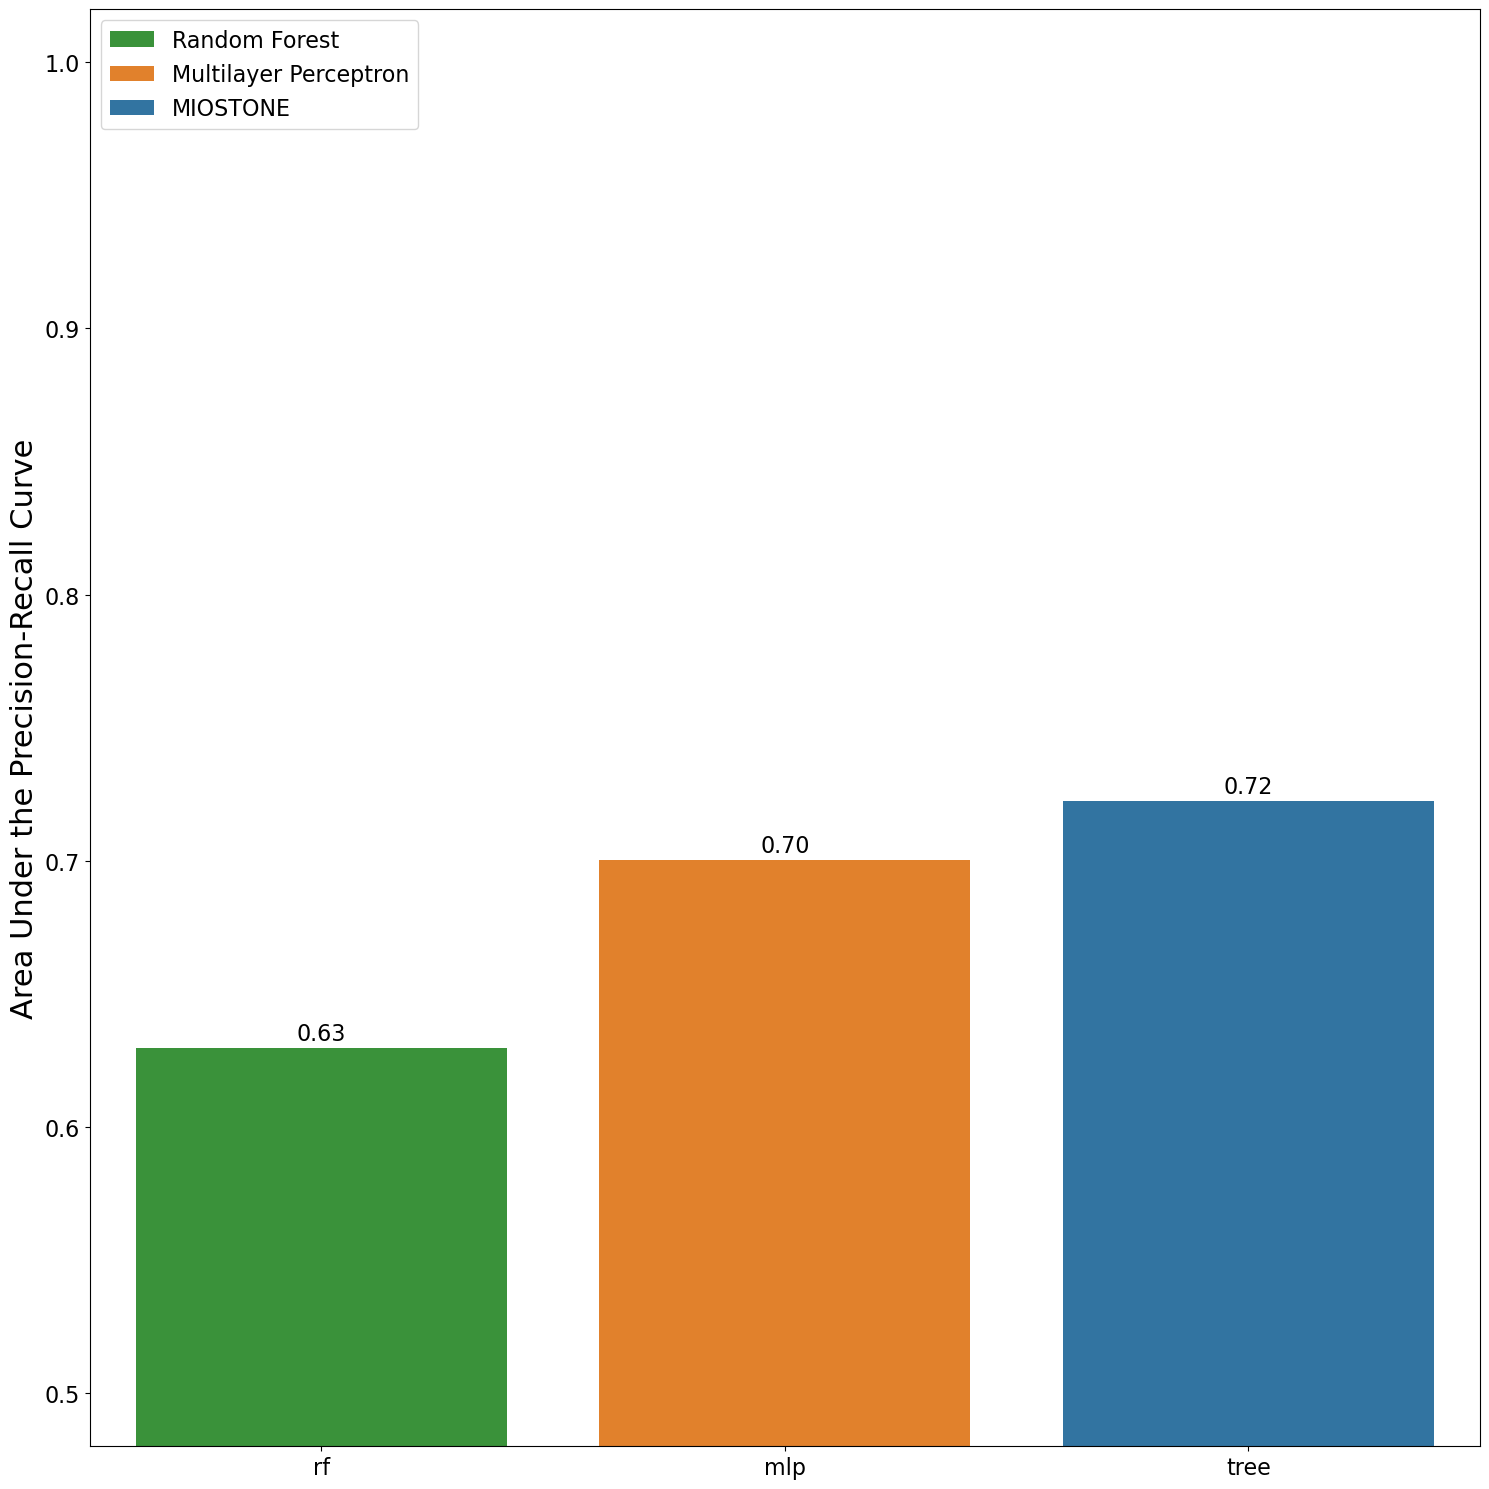

In [9]:
plot_model_metrics(results_df, args.metric, args.seeds_agg, hue, args.plot_type, args.metric_axis, args.other_axis)

## PART 3: EXPLANATION

### Step 1: Load saved model

In [10]:
model_path = os.path.join(models_dir, [m for m in os.listdir(models_dir) if "tree" in m and "fold2" in m][0])
model, _, hyperparams = load_model(model_path)

### Step 2: Preprocess the dataset

In [11]:
le = dataset.le
dataset = dataset.preprocess(args.preprocess)
dataset.le = le

### Step 3: Visualize the embeddings

100%|██████████| 8/8 [00:11<00:00,  1.47s/it]


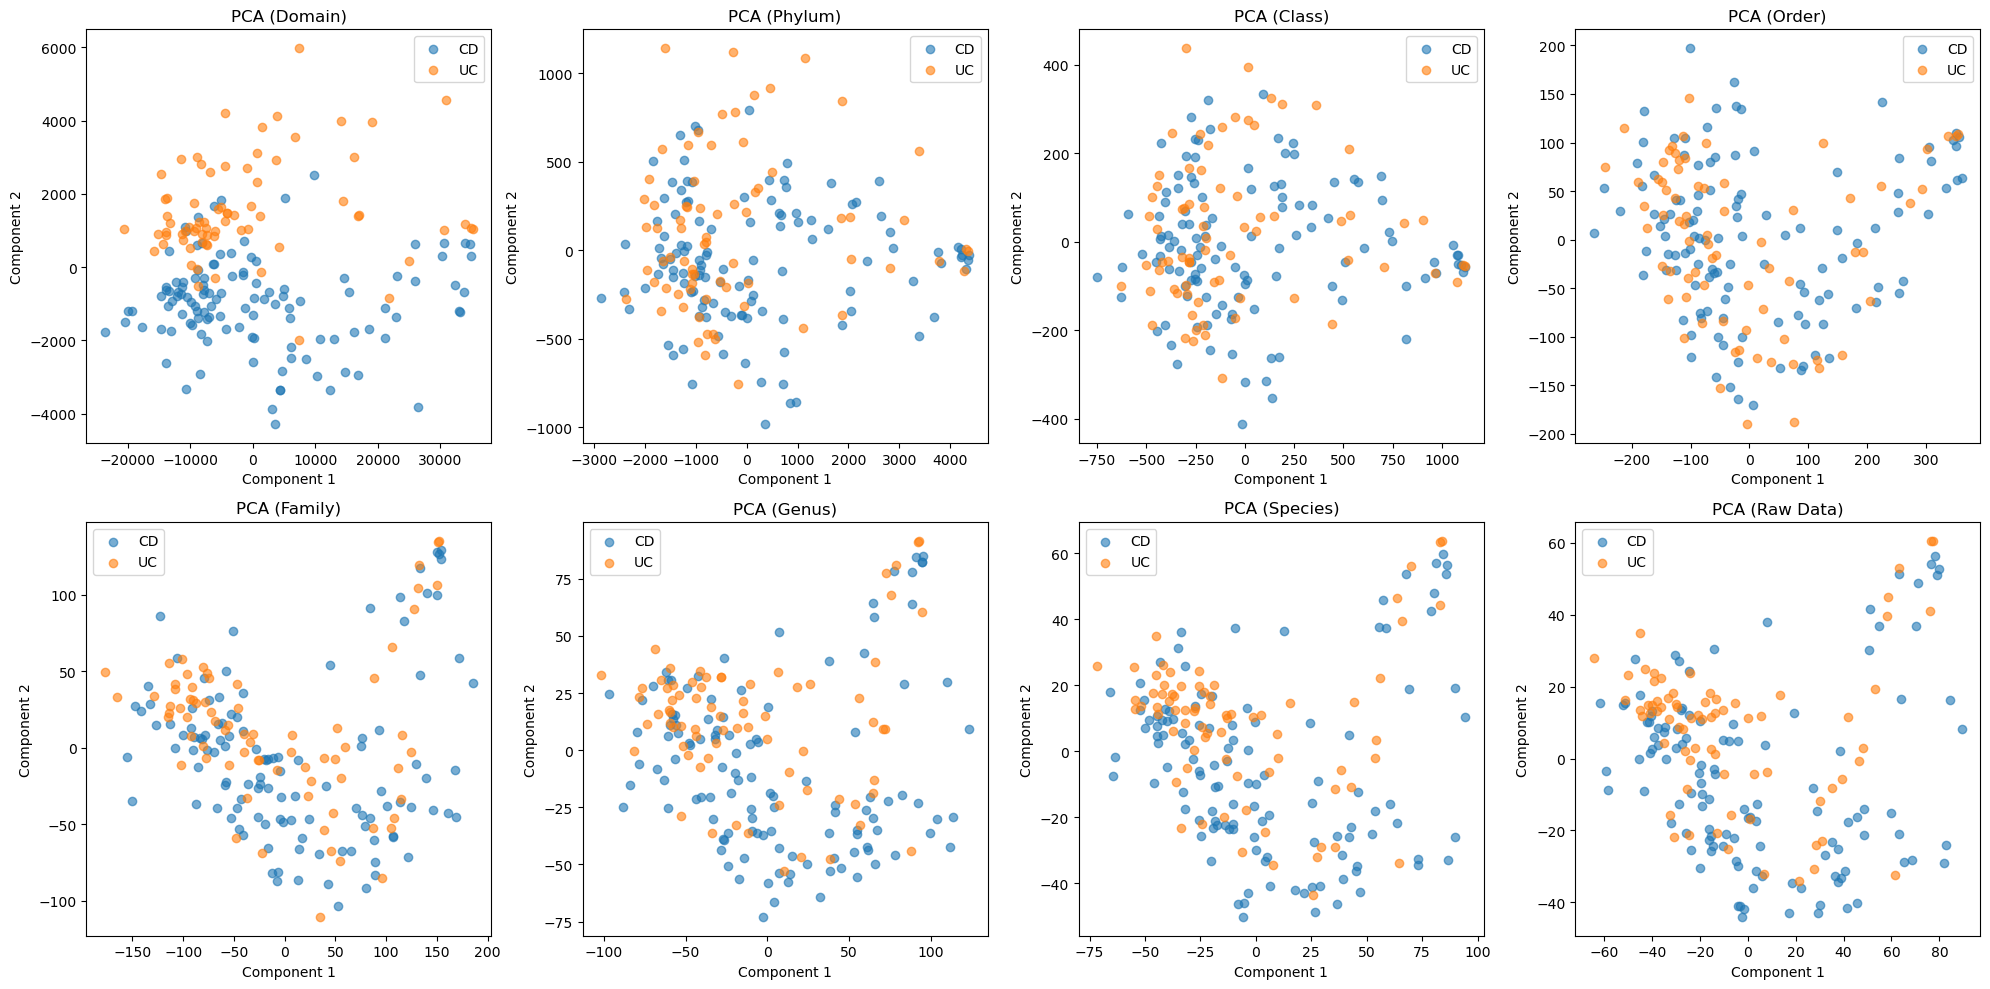

In [12]:
visualize_embeddings(args, model, dataset)

### Step 4: Set up the directory for saving the importance scores

In [13]:
attributions_dir = set_attributions_dir(args)

### Step 5: Compute the importance scores

In [14]:
leaf_values, layer_deeplift_values = compute_attributions(args, model_path, model, dataset, attributions_dir)

/home/yifan/miniconda3/lib/python3.11/site-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(
/home/yifan/miniconda3/lib/python3.11/site-packages/captum/attr/_core/deep_lift.py:304: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(


Loading attributions from ../results/IBD200/Type/attributions/3_tree_clr_reweight_386_50_ce_1_linear_0.95_concrete_0.1_0_tx_pd_ot_saved_fold2.pt_190_0_5.json...


### Step 6: Visualize the importance scores

Top 6 internal nodes with the highest DeepLIFT attributions and their top leaf nodes:
f__Lachnospiraceae: 1.0
	G000431995: 0.5025704837368175
	s__Copromonas sp900066535
f__Lactobacillaceae: 0.7604748612463733
	G000497815: 1.0
	s__Lactobacillus acidophilus
f__Enterobacteriaceae: 0.44661880970932627
	G012357415: 0.2983491186191316
	s__Escherichia coli
f__Burkholderiaceae: 0.2723063448826442
	G000431455: 0.5306327753169444
	s__Parasutterella excrementihominis
f__Streptococcaceae: 0.23586427824175918
	G000187975: 0.2033869710689927
	s__Streptococcus criceti
f__Bacteroidaceae: 0.20743034867541563
	G000598965: 0.22556514620216475
	s__Bacteroides fragilis


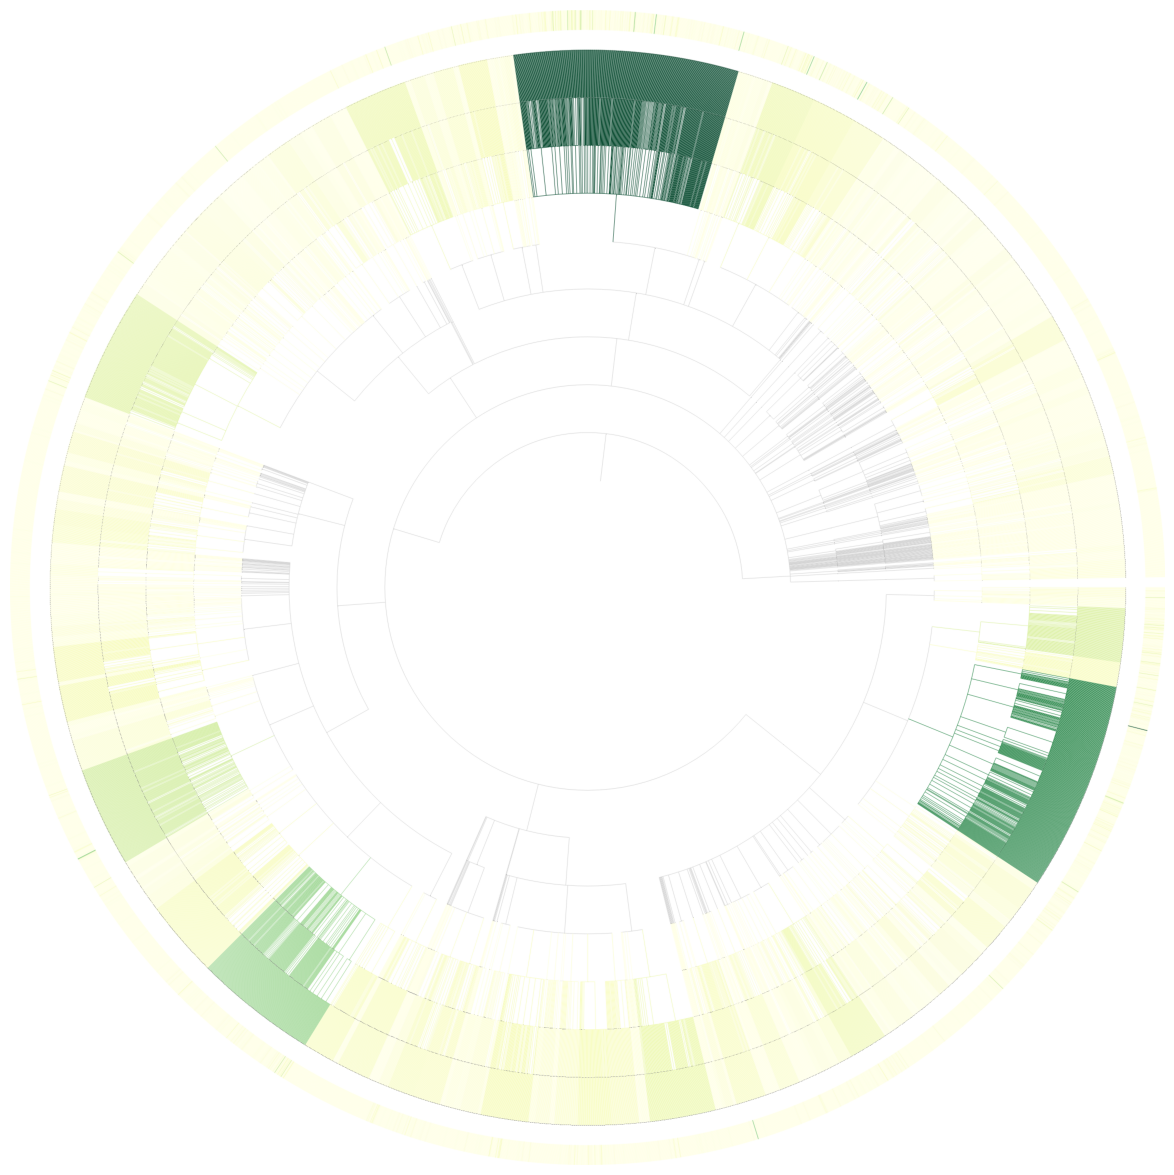

In [15]:
visualize_node_values(model.ete_tree, leaf_values, layer_deeplift_values[args.visualize_depth], attributions_dir)